We have the following regular expressions:
1: "a*",
2: "ab*",
3: "a?b*",
4: "ab",
5: "a*/b*",
6: "a*/b*/c",
7: "a/b/c",
8: "a/b*/c",
9: "(a | b | c)*", 
10: "(a | b |c)/b*"

And we instantiate two data constraint into the regular expressions

ABS 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
queries =  {
    1: "a*",
    2: "ab*",
    3: "a?b*",
    4: "ab",
    5: "a*/b*",
    6: "a*/b*/c",
    7: "a/b/c",
    8: "a/b*/c",
    9: "(a | b | c)*", 
    10: "(a | b |c)/b*"
}

In [10]:
import pickle
import numpy
f =  open('ldbc01/ldbc01_static.pkl', 'rb')
pickle_data = pickle.load(f)
c = 1
for i in pickle_data:
    if 'REGEX' in i[1]:
        print(f"{queries[c]:} |{round(numpy.average(i[2]),2)}| {round(numpy.max(i[2]),2)}")
        c = c + 1

a* |0.32| 10.6
ab* |0.32| 15.63
a?b* |0.35| 0.9
ab |0.41| 0.87
a*/b* |0.36| 0.84
a*/b*/c |0.32| 21.99
a/b/c |0.32| 0.72
a/b*/c |0.25| 0.72
(a | b | c)* |0.26| 0.63
(a | b |c)/b* |0.26| 0.57


In [80]:
import pickle
import numpy
f =  open('ldbc01/ldbc01_static.pkl', 'rb')
pickle_data = pickle.load(f)
c = 0
for i in pickle_data:
        if c%6 ==0: 
                print(" ")
                print("|  | Averge Time(ms) | Max Time(ms)|")
                print("|--|------------------|--------------|")
                c = c + 1
        else:
                print(f"D{list(i[1].split(' '))[1][-1]:} |{round(numpy.average(i[2]),2)}| {round(numpy.max(i[2]),2)}")
                c = c + 1

 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------|--------------|
D1 |1.75| 48.13
D2 |1.36| 2.22
D3 |1.51| 2.98
D4 |2.01| 17.51
D5 |2.71| 23.36
 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------|--------------|
D1 |1.64| 16.44
D2 |1.56| 16.68
D3 |2.41| 16.73
D4 |2.21| 16.29
D5 |3.29| 25.01
 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------|--------------|
D1 |1.79| 16.82
D2 |1.72| 3.68
D3 |3.89| 17.26
D4 |3.31| 15.8
D5 |5.0| 21.89
 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------|--------------|
D1 |5.39| 55.54
D2 |5.31| 64.93
D3 |6.17| 95.32
D4 |2.27| 17.17
D5 |3.36| 20.31
 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------|--------------|
D1 |1.79| 17.39
D2 |1.78| 4.26
D3 |4.03| 15.92
D4 |3.4| 15.75
D5 |5.02| 24.11
 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------|--------------|
D1 |5.49| 57.55
D2 |5.1| 51.67
D3 |2.73| 17.28
D4 |2.6| 16.82
D5 |3.53| 18.52
 
|  | Averge Time(ms) | Max Time(ms)|
|--|------------------

In [34]:
import pickle 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

def plot_time_performance(path, name, log_scale=True): 

    with open(path,"rb+") as f:
        data_ytb = pickle.loads(f.read()) 

    data_groups = []
    for i in range(10):  # Q1-Q10
        id = 0
        for dtype in ["RPQ", "D1", "D2", "D3", "D4", "D5"]:  # 3 种数据类型
            if id ==0:
                id = id + 1 
                continue
            data = list(map(lambda x: x, data_ytb[i*6 + id][2])) # 乘1000转换为ms
            id = id + 1
            data_groups.append((f"{queries[i+1]}", dtype, data))
    # 转换为 DataFrame
    df_list = []
    for group, dtype, values in data_groups:
        for v in values:
            df_list.append((group, dtype, v))
    df = pd.DataFrame(df_list, columns=["Query", "Data Constraint", "Running Time"])
    # 设置绘图风格
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")

    # **改回线性坐标**
    if log_scale:
        plt.yscale("log") 
    else:
        plt.yscale("linear")

    # 绘制箱线图
    ax = sns.boxplot(x="Query", y="Running Time", hue="Data Constraint", data=df, palette="Set2", showfliers=False)


    # **调整 Y 轴单位（毫秒）**
    plt.ylabel("Running Time (ms)")
    # **✅ 增加 Y 轴刻度**
    # plt.yticks(np.arange(0, 8, step=100))  # 这里 10 表示 1.0s（因为单位是 0.1s）

    # **✅ 调整 Y 轴 Label 位置（上方 & 水平）**
    ax.set_ylabel("Running Time (ms)")  # 水平显示

    # 调整图例
    plt.legend(title="Data Constraint", loc="upper left")
    # **✅ 增加网格**
    ax.yaxis.grid(True, linestyle="--", alpha=0.6)  # Y 轴添加虚线网格
    ax.xaxis.grid(True, linestyle="dotted", alpha=0.4)  # X 轴网格更柔和
    # 添加标题
    plt.title(f"Running Time Distribution with {name} Dataset")

    # 旋转 X 轴标签
    # plt.xticks(rotation=45)

    # **自动调整布局，防止标签重叠**
    plt.tight_layout()
    plt.savefig(f'figure/{name}-time.svg', format='svg', dpi=1200, bbox_inches='tight')

    # 显示图表
    plt.show()


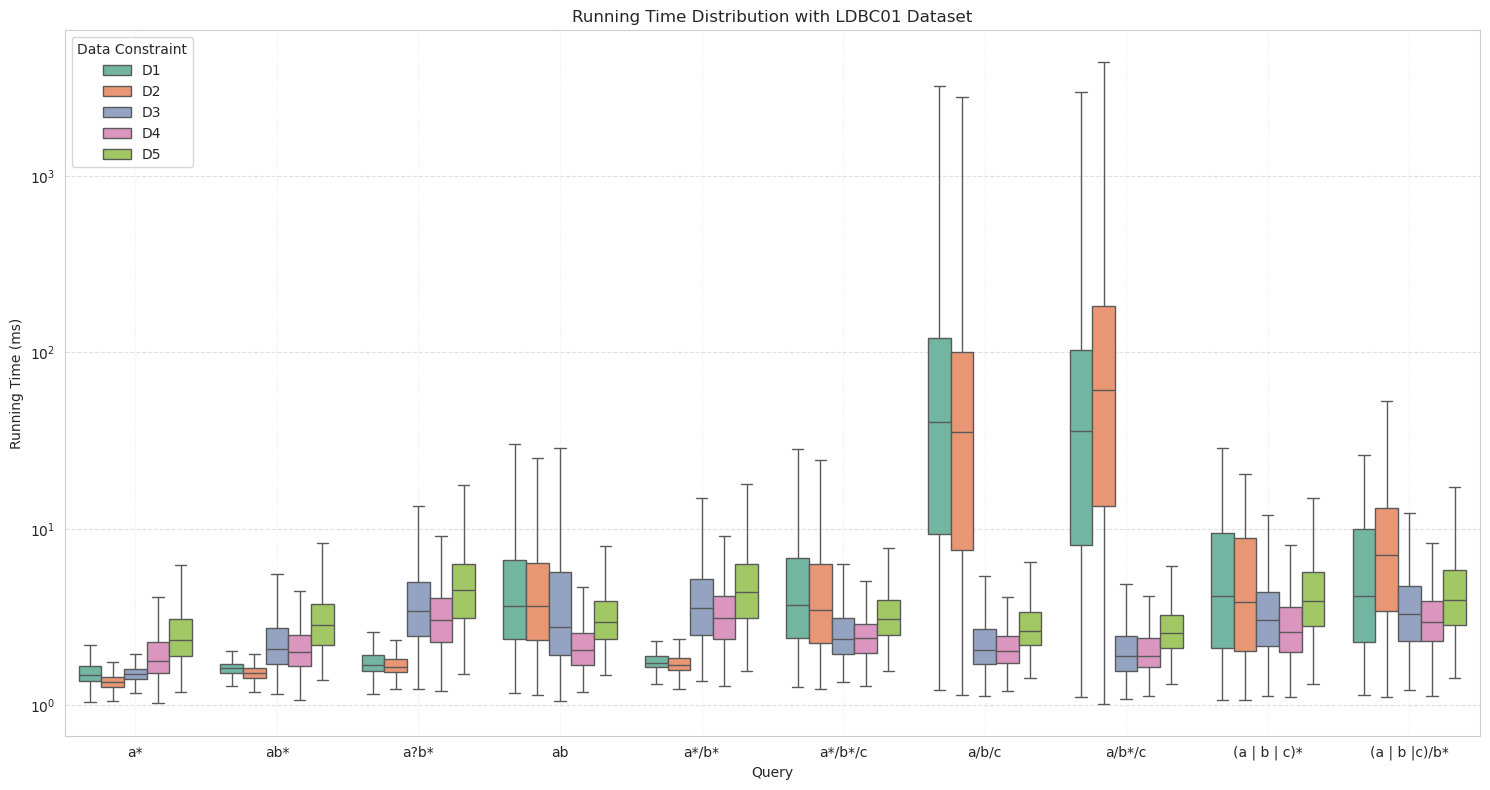

In [35]:
plot_time_performance('ldbc01/ldbc01_static.pkl', 'LDBC01', log_scale=True)

In [112]:
def slice_small_log(path):
    f  = open(path, "rb+") 
    count = 0 
    res = []
    d = {}
    for q in queries.items():
        d[f"{q[1]}"] = {}
    c1 = 1
    for line in f:
        if "exploration_depth" in line.decode('utf-8'):
            res.append(line.decode('utf-8')[-2])
            count += 1
            if count//5000 + 1 < 11:
                    d[f"{queries[count//5000 + 1]}"][f"D{c1%5 if c1%5 != 0 else 5}"] = res 
                    res = []
                    c1 += 1
    return d 

d = slice_small_log("ldbc01/z3_debug.log")

In [113]:
d['a*'].keys()

dict_keys(['D1', 'D2', 'D3', 'D4', 'D5'])

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

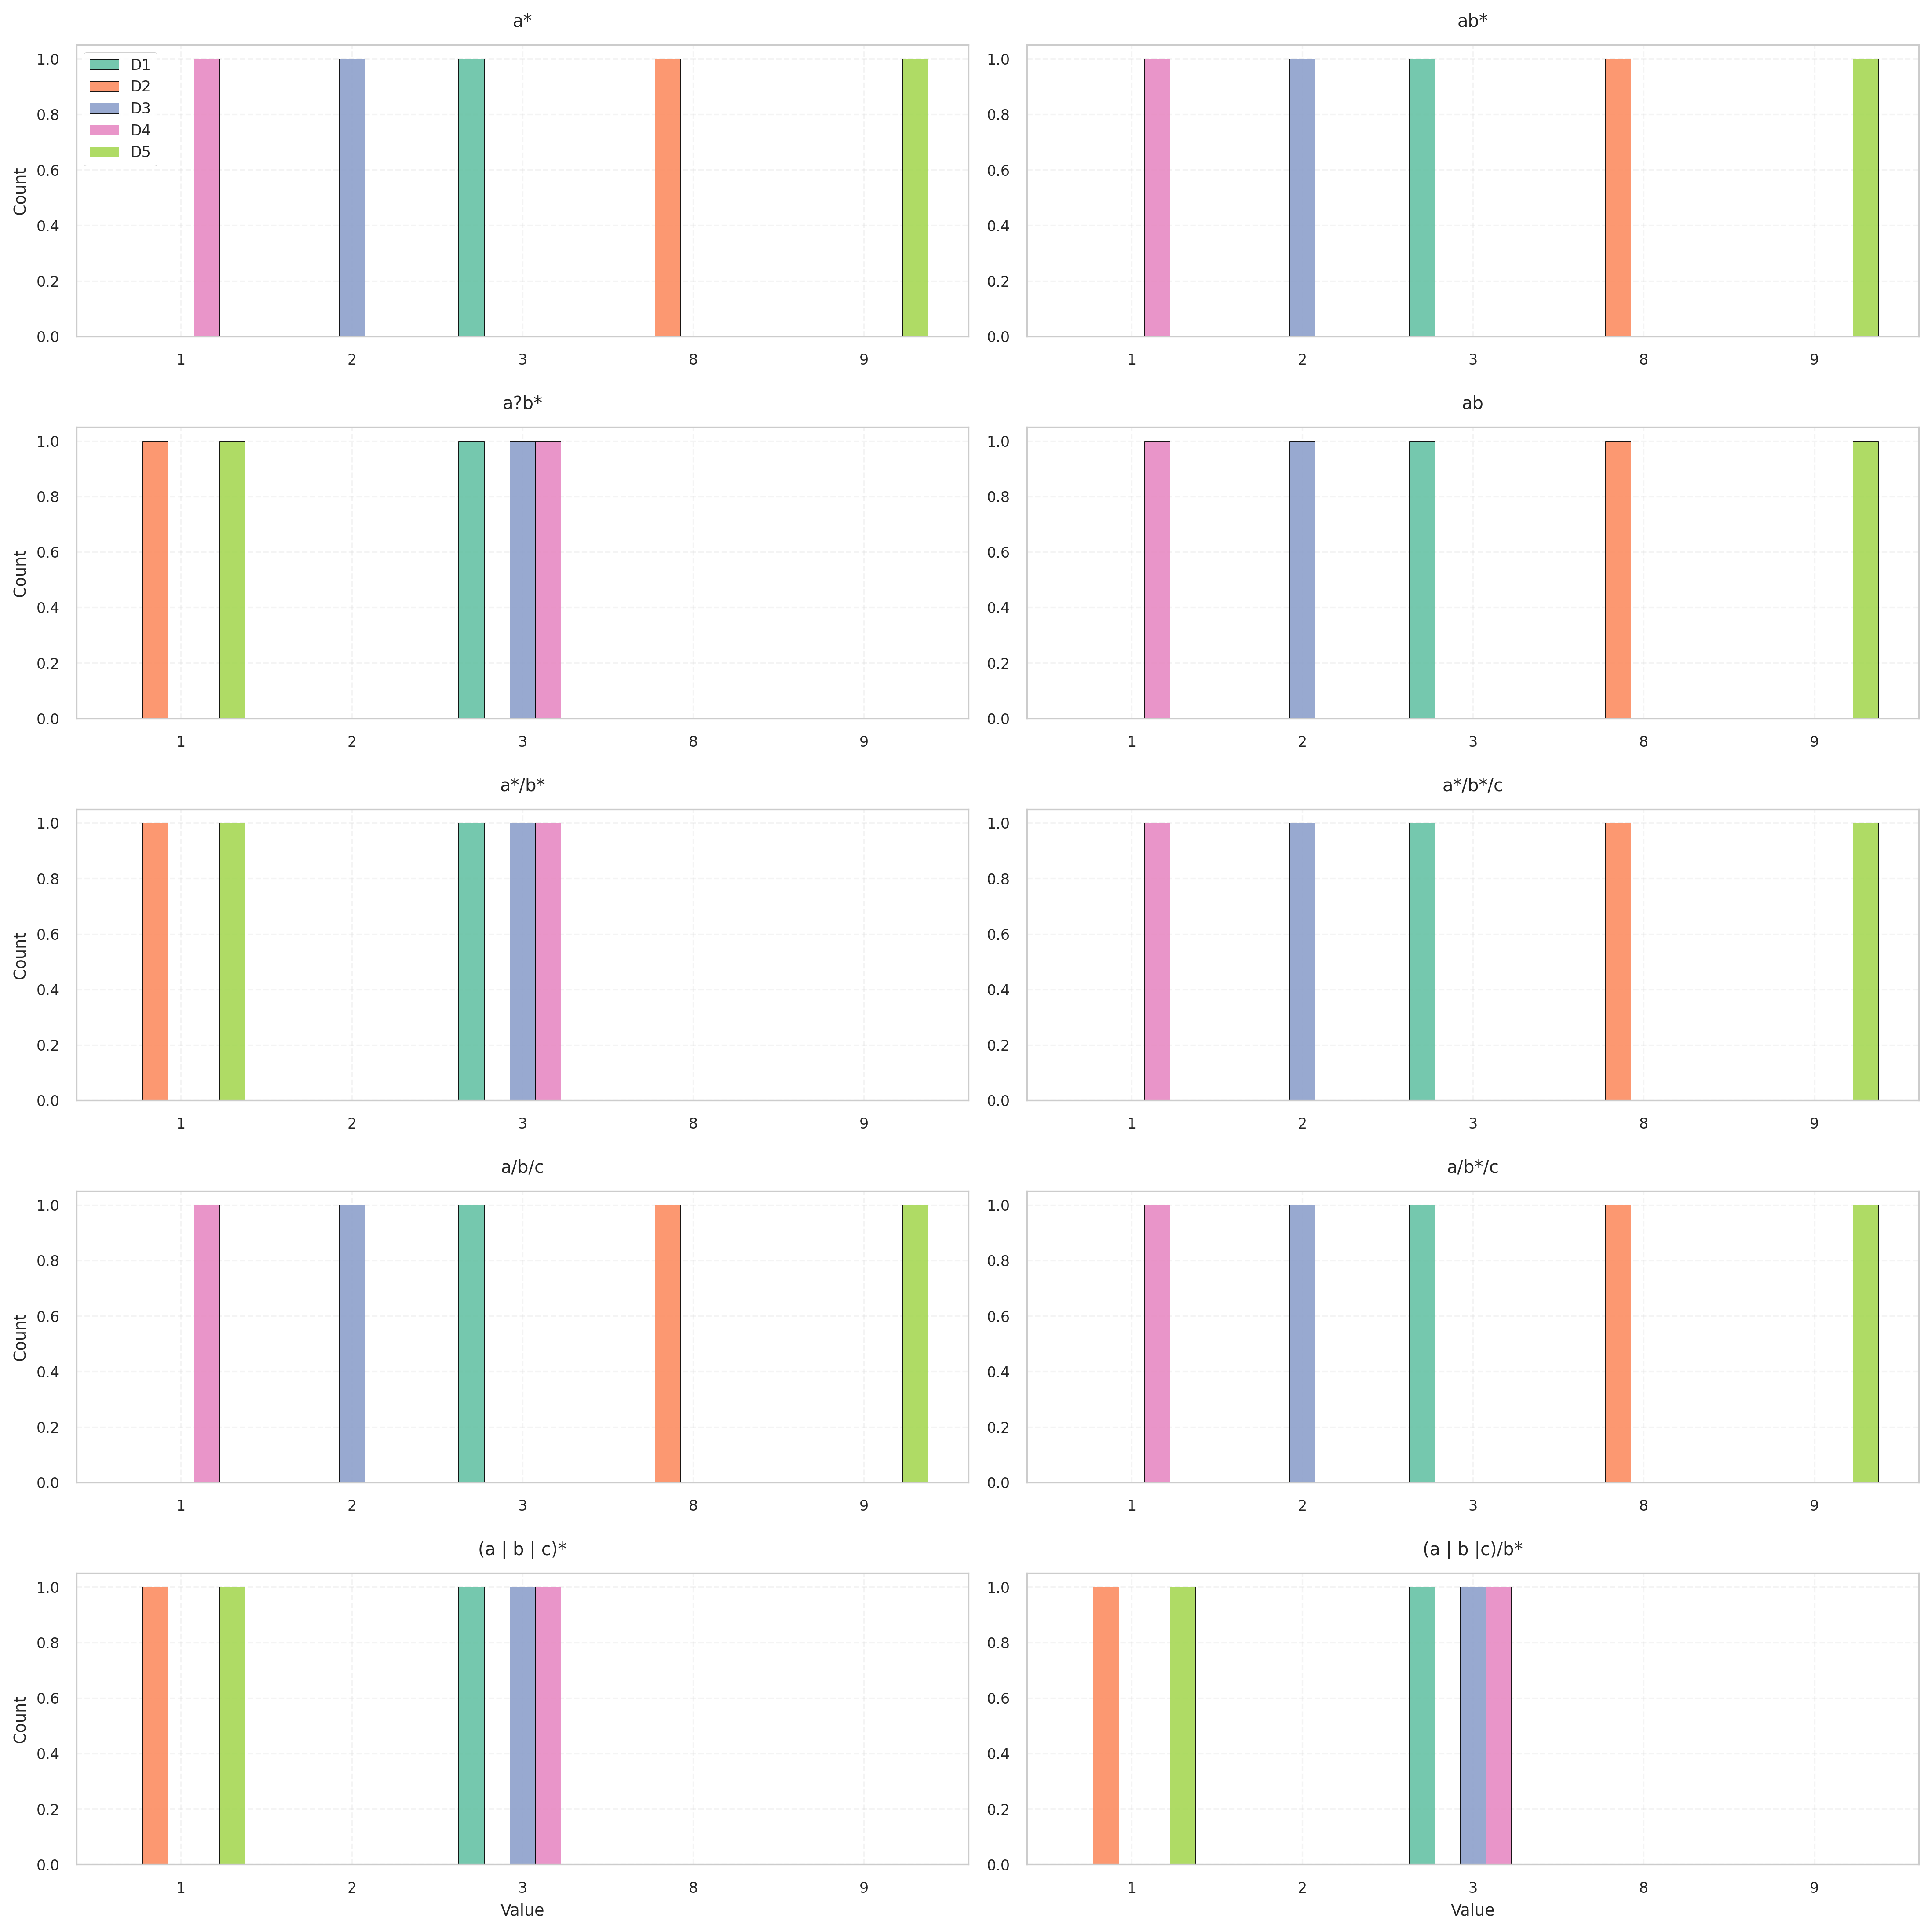

{'a*': {'D1': ['3'], 'D2': ['8'], 'D3': ['2'], 'D4': ['1'], 'D5': ['9']},
 'ab*': {'D5': ['9'], 'D1': ['3'], 'D2': ['8'], 'D3': ['2'], 'D4': ['1']},
 'a?b*': {'D5': ['1'], 'D1': ['3'], 'D2': ['1'], 'D3': ['3'], 'D4': ['3']},
 'ab': {'D5': ['9'], 'D1': ['3'], 'D2': ['8'], 'D3': ['2'], 'D4': ['1']},
 'a*/b*': {'D5': ['1'], 'D1': ['3'], 'D2': ['1'], 'D3': ['3'], 'D4': ['3']},
 'a*/b*/c': {'D5': ['9'], 'D1': ['3'], 'D2': ['8'], 'D3': ['2'], 'D4': ['1']},
 'a/b/c': {'D5': ['9'], 'D1': ['3'], 'D2': ['8'], 'D3': ['2'], 'D4': ['1']},
 'a/b*/c': {'D5': ['9'], 'D1': ['3'], 'D2': ['8'], 'D3': ['2'], 'D4': ['1']},
 '(a | b | c)*': {'D5': ['1'],
  'D1': ['3'],
  'D2': ['1'],
  'D3': ['3'],
  'D4': ['3']},
 '(a | b |c)/b*': {'D5': ['1'],
  'D1': ['3'],
  'D2': ['1'],
  'D3': ['3'],
  'D4': ['3']}}

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from matplotlib.cm import get_cmap

# 示例数据生成（q1-q10，D1-D5）
# np.random.seed(42)
# d = {f'q{i}': {f'D{j}': np.random.randint(1, 6, size=np.random.randint(3, 8)) 
#               for j in range(1, 6)} for i in range(1, 11)}



# 获取所有D键和所有可能的值
all_d_keys = sorted({k for q_data in d.values() for k in q_data})
all_values = sorted({v for q_data in d.values() for d_data in q_data.values() for v in d_data})

# 学术友好的颜色方案（使用ColorBrewer的Set2配色）
colors = get_cmap('Set2').colors[:len(all_d_keys)]

# 创建subplot网格（自动适应q的数量）
n_cols = 2  # 每行显示5个q
n_rows = int(np.ceil(len(d) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
axes = axes.flatten() if len(d) > 1 else [axes]

# 为每个q创建图表
for i, (q_key, q_data) in enumerate(d.items()):
    ax = axes[i]
    
    # 计算每个D中每个值的出现次数
    count_data = {}
    for d_key in all_d_keys:
        if d_key in q_data:
            count_data[d_key] = Counter(q_data[d_key])
    
    # 设置柱状图位置和宽度
    bar_width = 0.15
    x = np.arange(len(all_values))
    
    # 绘制每个D的柱状图
    for j, d_key in enumerate(all_d_keys):
        if d_key in count_data:
            counts = [count_data[d_key].get(v, 0) for v in all_values]
            ax.bar(x + j*bar_width, counts, width=bar_width,
                  label=d_key, edgecolor='black', color=colors[j], alpha=0.9)
    
    ax.set_title(q_key, pad=10)
    ax.set_xlabel('Value' if i >= (n_rows-1)*n_cols else '')
    ax.set_ylabel('Count' if i % n_cols == 0 else '')
    ax.set_xticks(x + bar_width*(len(all_d_keys)-1)/2)
    ax.set_xticklabels(all_values)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # 只在第一张图显示图例
    if i == 0:
        ax.legend(frameon=True, framealpha=0.9)

# 隐藏多余的子图
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=2.0, h_pad=1.5, w_pad=1.0)

# 保存为高分辨率图片（适合论文）
plt.savefig('academic_barplot.png', bbox_inches='tight', dpi=300)
plt.show()
d


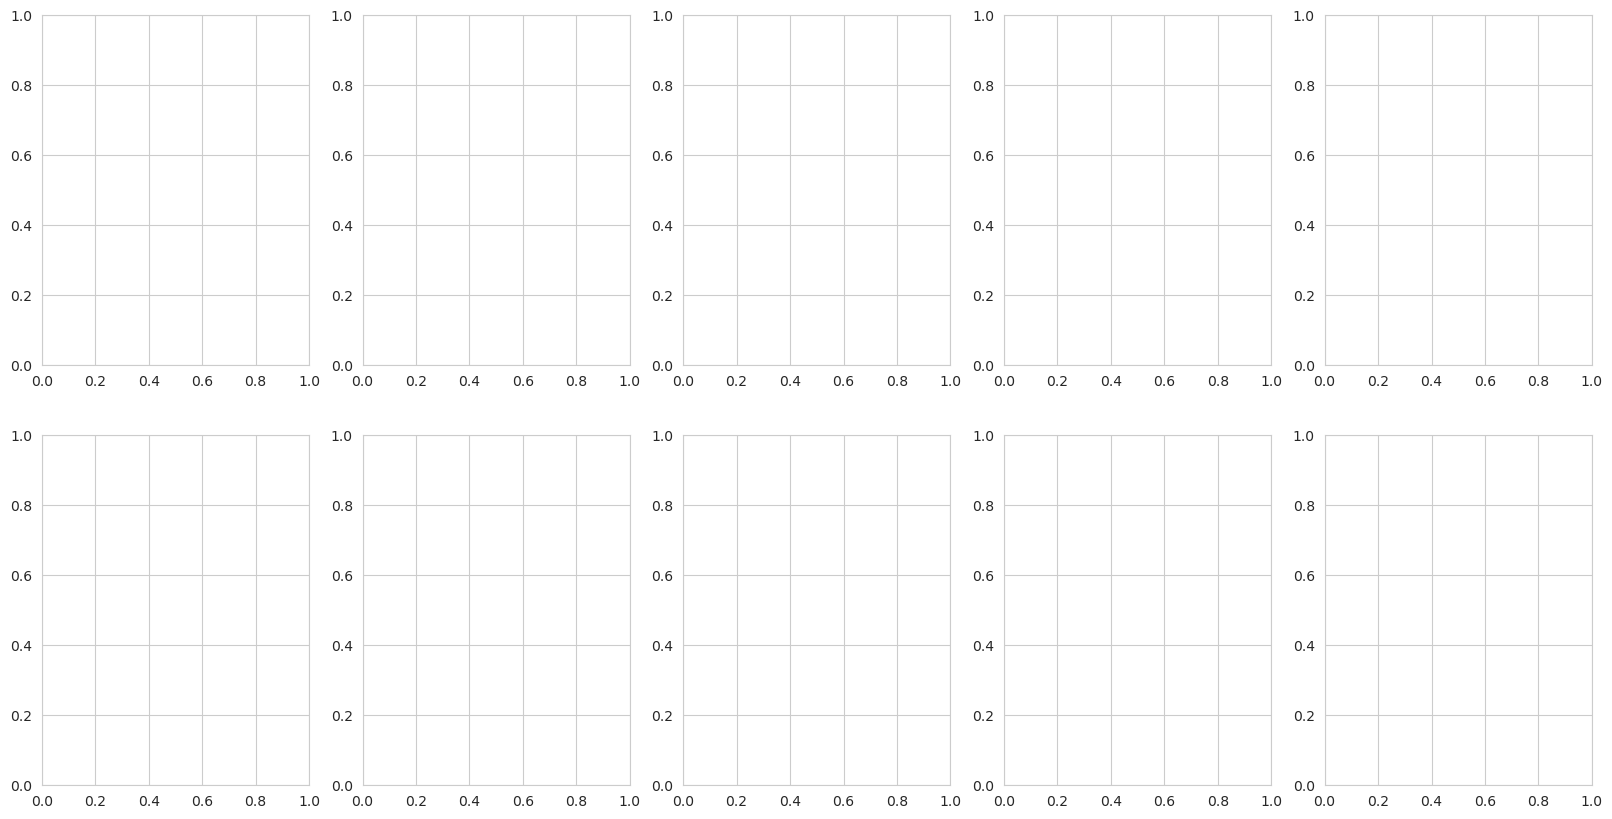

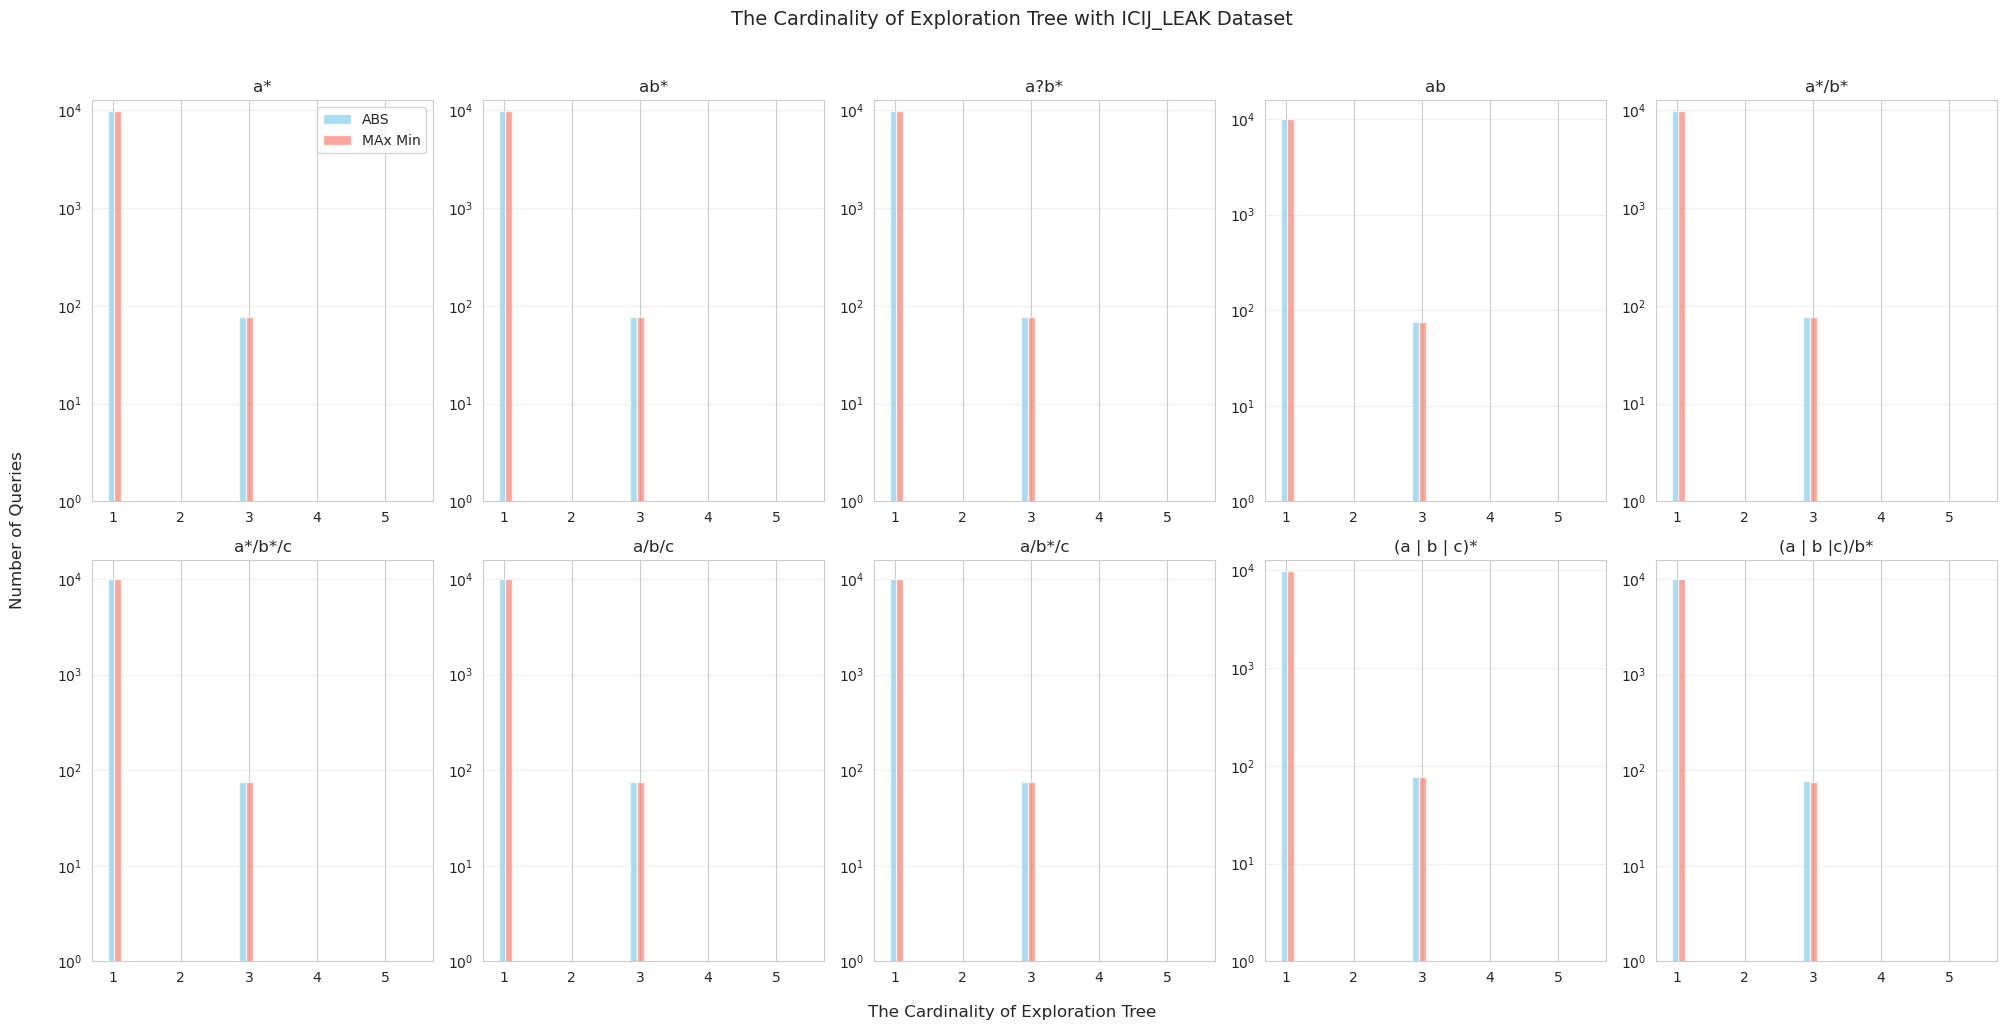

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 自动分类数据
max_data = {k: v for k, v in explore_steps_icij.items() if k.endswith("ABS") and len(v) != 0}
maxmin_data = {k: v for k, v in explore_steps_icij.items() if k.endswith("Min") and len(v) != 0}

# 设置随机种子保证可重复性
np.random.seed(42)

# 创建示例数据 - 10组，每组2类型
data = []
for i in range(10):
    group_name = f'{queries[i+1]}'
    type_a = max_data[f"{queries[i+1]} D1"]  # 类型A数据
    type_b = maxmin_data[f"{queries[i+1]} D2"]
    
    data.append((group_name, type_a, type_b))
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# 创建子图
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# 计算全局bins范围（线性坐标）
all_values = np.concatenate([type_a for _, type_a, _ in data] + [type_b for _, _, type_b in data])
linear_bins = np.linspace(all_values.min()*0.9, all_values.max()*1.1, 20)

for i, (ax, (name, type_a, type_b)) in enumerate(zip(axes, data)):
    # 绘制直方图（不堆叠）
    ax.hist([type_a, type_b], bins=linear_bins, 
            color=['skyblue', 'salmon'], alpha=0.7,
            label=['ABS', 'MAx Min'])
    
    # 仅设置Y轴为对数坐标
    ax.set_yscale('log')
    
    # 设置Y轴最小值为1（避免log(0)问题）
    ax.set_ylim(bottom=1)
    
    # 添加标题和网格
    ax.set_title(name)
    ax.grid(True, axis='y', alpha=0.3)
    
    # 只在第一个子图添加图例
    if i == 0:
        ax.legend()

fig.supxlabel('The Cardinality of Exploration Tree')
fig.supylabel('Number of Queries', x = -0.001)
# 添加整体标题和调整布局

fig.suptitle('The Cardinality of Exploration Tree with ICIJ_LEAK Dataset', y=1.02, fontsize=14)
plt.tight_layout()

plt.savefig('figure/icij-step.svg', format='svg', dpi=1200, bbox_inches='tight')

plt.show()